In [25]:
import re
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [26]:

#infile = open("output_N_tau=120_m=0.1_omega=0.1.txt", "r")
#infile = open("output_N_tau=120_m=0.1_omega=0.1.txt", "r")
infile = open("output_N_tau=120_m=0.1_omega=0.1.txt", "r")
s = infile.read()
tokens = s.split('[')[1:]
# we discard tokens[0]
for i,path in enumerate(tokens):
    new_path = re.sub('\]|\n', '', path)
    tokens[i] = new_path
#x_data = [path for path in tokens[1:]]
#print(tokens)
# print(tokens[0].split())
pathList = [[0.0]*len(tokens[0].split())]*len(tokens)
#print(pathList)
for i in range(len(tokens)):
    #print([float(x_i) for x_i in tokens[i].split()])
    pathList[i] = [float(x_i) for x_i in tokens[i].split()]
    
# discard first 100 steps as thermalization
print(len(pathList))
pathList = pathList[10:]

N_tau = len(pathList[0])
#print(pathList)

1000


In [27]:
# obtaining the average of the action <S>
# to do this, we take each path and use the formula S = sum i to N_tau
m = 1.0
omega = 1.0
print(N_tau)


S_arr = np.zeros(len(pathList))
for pNum,path in enumerate(pathList):
    x = path
    S = 0.0
    for i in range(N_tau):
        tau_plus = (i+1)%N_tau
        tau_minus = (i-1+N_tau)%N_tau
        #print(tau_minus)
        x_plus = x[tau_plus]
        x_minus = x[tau_minus]
        S += 0.5*m*(x_plus - x[i])**2 + 0.5*m*(omega**2)*(x[i]**2)
    S_arr[pNum] = S

120


In [28]:
# define the observable you want the error on.
import itertools
O = np.array(list(itertools.chain.from_iterable(pathList)))**2
O_x = np.array(list(itertools.chain.from_iterable(pathList))) # (1/N_tau)
O
# O = S_arr

array([46.53939529, 55.93351996, 18.63179404, ...,  0.07612583,
        0.33912132, 10.47473366])

In [29]:
N_sep = 100 # config sample frequency



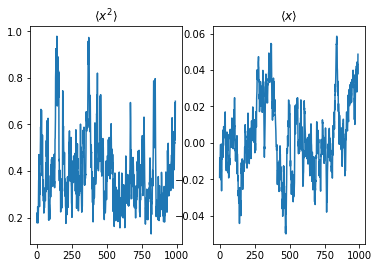

In [30]:
# plotting <x> and <x^2> behaviour

N_sep = 1 # config sample frequency

#x_avg = [(1/N_tau)*np.mean(np.array(path)) for path in pathList[::N_sep]]
#x2_avg = [(1/N_tau)*np.mean(np.array(path)**2) for path in pathList[::N_sep]]
# the below are for plotting HMC, the above is for plotting ordinary standard MCMC
x_avg = [(1/N_tau)*np.mean(np.array(path)) for path in pathList]
x2_avg = [(1/N_tau)*np.mean(np.array(path)**2) for path in pathList]

fig, (ax1,ax2) = plt.subplots(1,2) 
# ax1.xlabel("Config number")
ax1.set_title(r'$\langle x^2 \rangle$')
# ax1.plot([N_sep*i for i in range(int(len(pathList)/N_sep))], x2_avg) #per site
ax1.plot([N_sep*i for i in range(len(x_avg))], x2_avg) #per site
ax2.set_title(r'$\langle x \rangle$')
#ax2.xlabel("Config number")
#ax2.ylabel(r'$\langle x \rangle')
ax2.plot([N_sep*i for i in range(int(len(pathList)/N_sep))], x_avg) # per site 
plt.show()


In [31]:

#psi_0 = np.histogram([np.mean(path) for path in pathList],bins='auto', density=True)
# REMEMBER THAT WE DON'T HAVE TO SQUARE psi_0 BECAUSE IN FORMING A HISTOGRAM, WE GET A PROBABILITY DENSITY FOR x, WHICH IS 
# PRECISELY WHAT |psi_0|^2 is. 
psi_0 = np.histogram([x_i for path in pathList for x_i in path],bins=100, density=True)
# we obtain the average of each path to ploAssertionErrort psi_0 and obtain the other observables
 



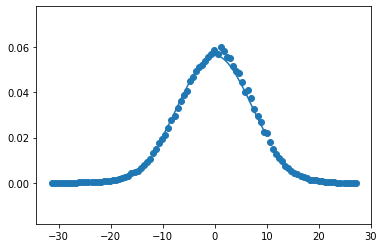

In [32]:
# I should normalize btw
# plt.scatter(list(psi_0[1])[1:], list(psi_0[0]**2))
#print(psi_0)
# list((1/2.0)*(psi_0[1][1:]+psi_0[1][:-1])) # for plotting bin centers
plt.scatter(psi_0[1][:-1], psi_0[0]) # plotting lhs bin edges
x = np.linspace(-10,10,100)
y = (0.1/(np.sqrt(np.pi)))*np.exp(-(0.1**2)*x**2) # plot |psi_0|**2 with m=0.1, omega=0.1
plt.plot(x,y)


In [33]:
np.exp(1)

2.718281828459045

In [34]:
# Obtain Jacknife estimates of the errors on <x>, <x^2> 
import math


N = len(O)
B = int(0.01*N)

############################################################################
# if(N%B != 0.0):                                                          #
#     # B doesn't divide N. ditch first few O_i until we have divisibility #
#     O = O[(N/B - math.floor(N/B))* B):]                                  #
############################################################################

N_B = int(N/B)

# obtain <x>, the average over the gathered configs
tot = np.sum(O)
avg = tot/N


o = np.zeros(N_B)
jack_estim = np.zeros(N_B)
for i in range(N_B):
    o[i] = np.sum(O[i*B:(i+1)*B])
    jack_estim[i] = (1/(N-B)) * (tot - o[i])
    
#np.linalg.norm(o-avg)**2
jack_var = ((N_B-1)/(N-B))*(np.linalg.norm(jack_estim-avg)**2)

error = math.sqrt(jack_var)

error

0.04572007642859

In [35]:
avg

47.00962831988986

In [36]:
avg/N_tau

0.39174690266574885